In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [2]:
 len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
 train_labels[10]

3

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# one hot encoding

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
# Define the model

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
# Compiling the model

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
# Validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
# Training the model

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.6418 - accuracy: 0.5396 - val_loss: 1.7667 - val_accuracy: 0.6720
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.4323 - accuracy: 0.7076 - val_loss: 1.3215 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0533 - accuracy: 0.7803 - val_loss: 1.1295 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8199 - accuracy: 0.8295 - val_loss: 1.0222 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6480 - accuracy: 0.8657 - val_loss: 0.9836 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5155 - accuracy: 0.8943 - val_loss: 0.9169 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4120 - accuracy: 0.9148 - val_loss: 0.8927 - val_accuracy: 0.8150
Epoch 8/20
16

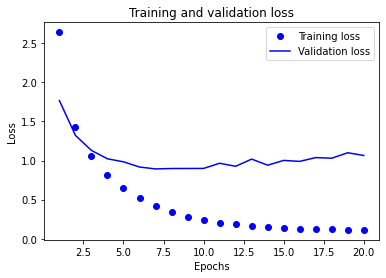

In [12]:
# Plot training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

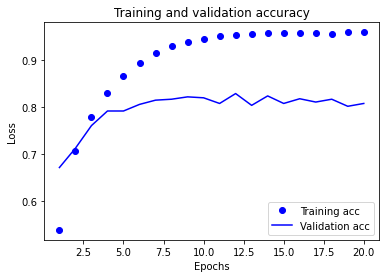

In [13]:
# Plotting the training and validation accuracy

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 2.5460 - accuracy: 0.5307 - val_loss: 1.6932 - val_accuracy: 0.6450
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.4022 - accuracy: 0.7068 - val_loss: 1.3101 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.0643 - accuracy: 0.7714 - val_loss: 1.1514 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 19ms/step - loss: 0.8361 - accuracy: 0.8235 - val_loss: 1.0282 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6711 - accuracy: 0.8592 - val_loss: 0.9590 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5377 - accuracy: 0.8866 - val_loss: 0.9405 - val_accuracy: 0.7900
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4303 - accuracy: 0.9104 - val_loss: 0.9067 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [15]:
results

[0.9926513433456421, 0.780053436756134]

In [16]:
 import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

In [17]:
# Generating predictions for new data

predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [18]:
np.sum(predictions[0])

0.9999999

In [19]:
np.argmax(predictions[0])

3